In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
PATH = "../Data/HospitalityEmployees.csv"

df = pd.read_csv(PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


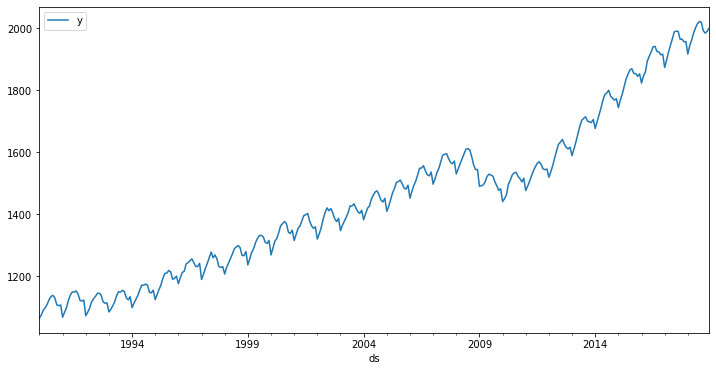

In [6]:
df.plot(x='ds', y='y', figsize=(12, 6))

In [8]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


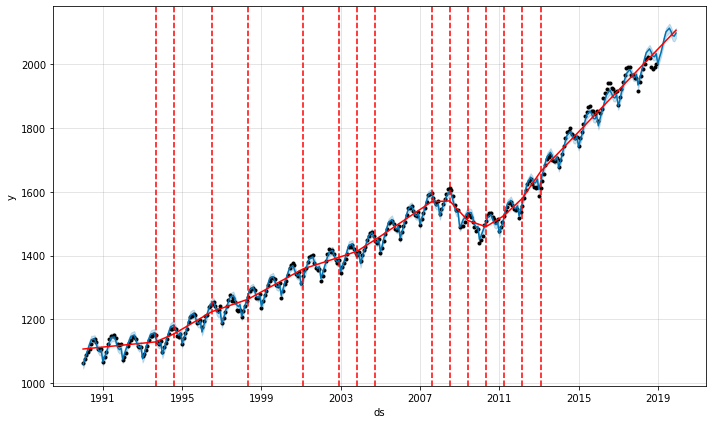

In [9]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)